# Results summary


In [1]:
# utils
from sincfold.metrics import f1_tol
from sincfold.utils import dot2bp
import json

dotbracket_format = ["IPknot", "ProbKnot", "RNAstructure", "LinearFold", "REDfold", 
                          "LinearFold-C", "LinearFold-V", "LinearPartition-C", "LinearPartition-V", "MXfold2"]

def get_f1(x):
    if x.method in dotbracket_format:
        _, _, f1 = f1_tol(x["ref"], dot2bp(x["folding"]))
    else:
        _, _, f1 = f1_tol(x["ref"], json.loads(x["folding"]))
    
    return f1

## Ablation study 

Median F1 score


method
CNN1D                              0.726330
ResNet1D                           0.742760
CNN1D+restrictions(CNN2D)          0.820450
CNN1D+restrictions(ResNet2D)       0.830971
ResNet1D+restrictions(ResNet2D)    0.843046
dtype: float64

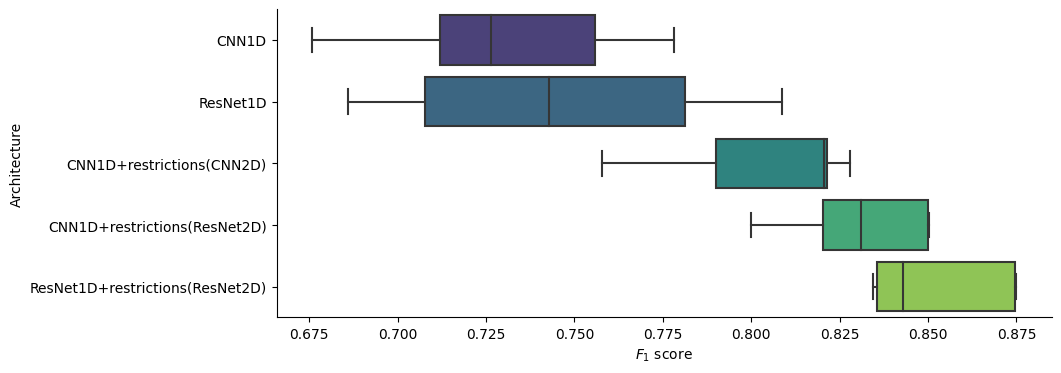

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import sys
import numpy as np 

sys.path.append("../")

methods = ["CNN1D", "ResNet1D", "CNN1D+restrictions(CNN2D)", "CNN1D+restrictions(ResNet2D)", "ResNet1D+restrictions(ResNet2D)"]

summary = pd.read_csv(f"ablation.csv", index_col="id")

dataset = pd.read_csv(f"../data/ablation.csv", index_col="id")
splits = pd.read_csv(f"../data/ablation_splits.csv")

# add references and compute F1 per sequence
summary["ref"] = dataset.loc[summary.index]["base_pairs"].apply(lambda x: json.loads(x))        

summary["F1"] = summary.apply(get_f1, axis=1)

# add fold id
for fold_number in splits.fold_number.unique():
    test_ids = splits[(splits.partition=="test") & (splits.fold_number==fold_number)].id
    summary.loc[summary.index.isin(test_ids), "fold_number"] = fold_number

# average over folds
summary = summary.groupby(["fold_number", "method"]).F1.mean().unstack().T

plt.figure(figsize=(10, 4))
ax = sns.boxplot(data=summary.T,  orient="h", palette="viridis" , order=methods)
ax.set_xlabel("$F_1$ score")
ax.set_ylabel("Architecture")
#ax.set_title(f"Ablation study");
ax.spines[['right', 'top']].set_visible(False);

print("Median F1 score")
display(summary.loc[methods].T.median())

## Benchmark I

Median F1 score


method
RNAfold              0.654902
RNAstructure         0.662629
ProbKnot             0.660613
IPknot               0.712555
LinearPartition-V    0.652507
LinearFold-V         0.654941
LinearPartition-C    0.730836
LinearFold-C         0.731955
MXfold2              0.742338
UFold                0.971260
REDfold              0.979693
sincFold             0.984501
dtype: float64

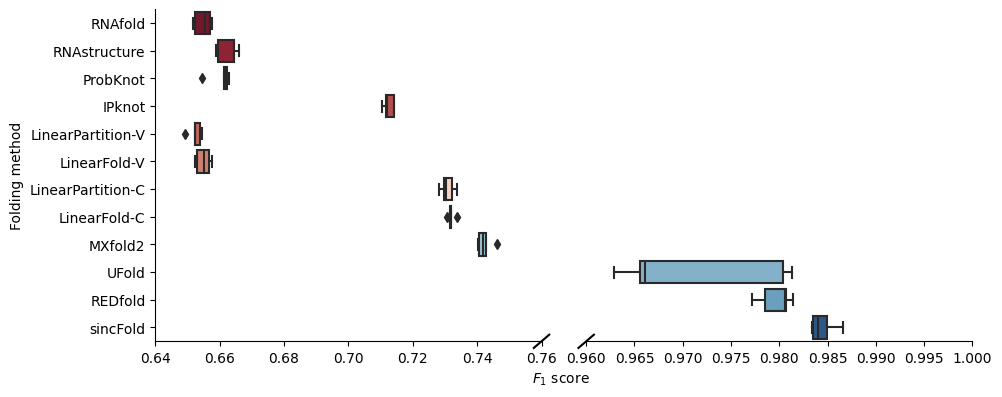

In [4]:
methods = ['RNAfold', 'RNAstructure', 'ProbKnot', 'IPknot', 'LinearPartition-V', 'LinearFold-V', 
           'LinearPartition-C', 'LinearFold-C',   
           'MXfold2', 'UFold', 'REDfold', 'sincFold']

summary = pd.read_csv(f"benchmarkI.csv", index_col="id")

dataset = pd.read_csv(f"../data/benchmarkI.csv", index_col="id")
splits = pd.read_csv(f"../data/benchmarkI_splits.csv")

# add references and compute F1 per sequence
summary["ref"] = dataset.loc[summary.index]["base_pairs"].apply(lambda x: json.loads(x))        

summary["F1"] = summary.apply(get_f1, axis=1)

# add fold id
for fold_number in splits.fold_number.unique():
    test_ids = splits[(splits.partition=="test") & (splits.fold_number==fold_number)].id
    summary.loc[summary.index.isin(test_ids), "fold_number"] = fold_number

# add average over folds
summary = summary.groupby(["fold_number", "method"]).F1.mean().unstack().T

for method in methods:
    if method not in summary.index:
        summary = pd.concat((summary, pd.Series(index=[method])))

base = sns.color_palette("RdBu", 25)
palette = base[:6] + base[9:11] + base[17:20] + base[-2:-1]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=summary.T,  orient="h", palette=palette, order=methods, ax=ax[0])
sns.boxplot(data=summary.T,  orient="h", palette=palette, order=methods, ax=ax[1])
ax[0].set_xlim(.64, .76)
ax[1].set_xlim(.96, 1)
ax[1].set_ylabel("")
# remove ticks from ax[1]
ax[1].set_yticks([])

ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].tick_params(labelright=False)  

d = .020 
kwargs = dict(transform=ax[0].transAxes, color='k', clip_on=False)
ax[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  

kwargs.update(transform=ax[1].transAxes)  
ax[1].plot((0 - d, 0 + d), (-d, +d), **kwargs)  

ax[0].set_xlabel("$F_1$ score", x=1.05)
ax[0].set_ylabel("Folding method")

print("Median F1 score")
display(summary.loc[methods].T.mean())
fig.tight_layout(pad=.8)


## Benchmark II

Median F1 score


method
RNAfold              0.611853
RNAstructure         0.593509
ProbKnot             0.605120
IPknot               0.642508
LinearPartition-V    0.619238
LinearFold-V         0.639243
LinearPartition-C    0.646008
LinearFold-C         0.639243
MXfold2              0.633085
UFold                0.876537
REDfold              0.848026
sincFold             0.913025
dtype: float64

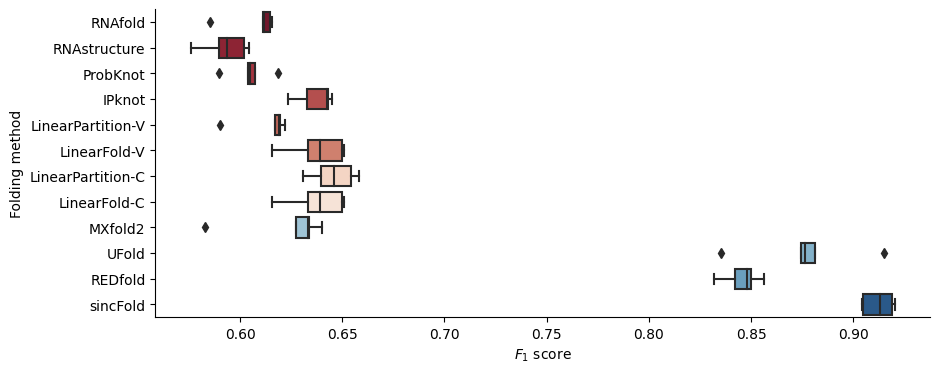

In [5]:
dotbracket_format = ["IPknot",  "RNAstructure", "REDfold", 
                          "LinearFold-C", "LinearFold-V", "LinearPartition-C", "LinearPartition-V", "MXfold2"]

methods = ['RNAfold', 'RNAstructure', 'ProbKnot', 'IPknot', 'LinearPartition-V', 'LinearFold-V', 
           'LinearPartition-C', 'LinearFold-C',   
           'MXfold2', 'UFold', 'REDfold', 'sincFold']

summary = pd.read_csv(f"benchmarkII.csv", index_col="id")

dataset = pd.read_csv(f"../data/benchmarkII.csv", index_col="id")
splits = pd.read_csv(f"../data/benchmarkII_splits.csv")

# add references and compute F1 per sequence
summary["ref"] = dataset.loc[summary.index]["base_pairs"].apply(lambda x: json.loads(x))        

summary["F1"] = summary.apply(get_f1, axis=1)

# add fold id
for fold_number in splits.fold_number.unique():
    test_ids = splits[(splits.partition=="test") & (splits.fold_number==fold_number)].id
    summary.loc[summary.index.isin(test_ids), "fold_number"] = fold_number

# add average over folds
summary_avg = summary.groupby(["fold_number", "method"]).F1.mean().unstack().T

plt.figure(figsize=(10, 4))
ax = sns.boxplot(data=summary_avg.T,  orient="h", palette=palette, order=methods)
ax.set_xlabel("$F_1$ score")
ax.set_ylabel("Folding method")
ax.spines[['right', 'top']].set_visible(False);

print("Median F1 score")
display(summary_avg.loc[methods].T.median())


### Performance per family

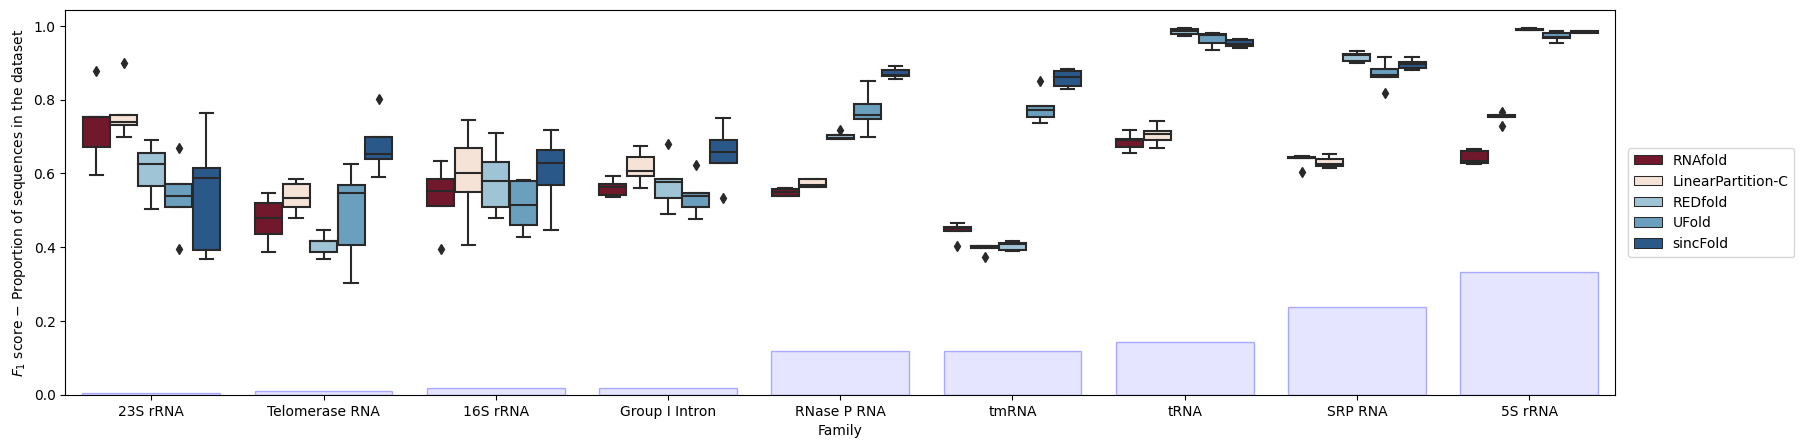

In [7]:
# Select best performing methods for the plot 
methods = ['RNAfold', 'LinearPartition-C', 'REDfold', 'UFold', 'sincFold']
summary = summary[summary.method.isin(methods)]

summary["Family"] = summary.index.str.split("_").str[0]

# Add complete family names
summary["Family"] = summary["Family"].replace({"5s": "5S rRNA", "srp": "SRP RNA", "RNaseP": "RNase P RNA", 
                                               "grp1": "Group I Intron", "16s": "16S rRNA", "23s": "23S rRNA",
                                               "telomerase": "Telomerase RNA"})

fam_count = summary.groupby("Family").ref.count()
fam_count /= fam_count.sum()
fam_count.sort_values(ascending=True, inplace=True)

# get average per fold per method and family
summary_avg = summary.groupby(["fold_number", "method", "Family"]).F1.mean().reset_index()

pal = palette[:1] + palette[7:8] + palette[8:9] + palette[10:11] + palette[-1:]

plt.figure(figsize=(20, 5))
bp = sns.barplot(x=fam_count.index, y=fam_count, 
                 facecolor=(0.0,0.0,1.0,0.1), linewidth=1, 
                 edgecolor=(0.0,0.0,1.0,0.3), zorder=-1)

vp = sns.boxplot(data=summary_avg,  x="Family", y="F1", hue="method", 
                 zorder=1, hue_order=methods, order=fam_count.index, palette=pal)
vp.set_ylabel("$F_1$ score $-$ Proportion of sequences in the dataset");
vp.legend(bbox_to_anchor=(1.12,.5),loc='right', ncol=1);

### Performance by train-test similarity

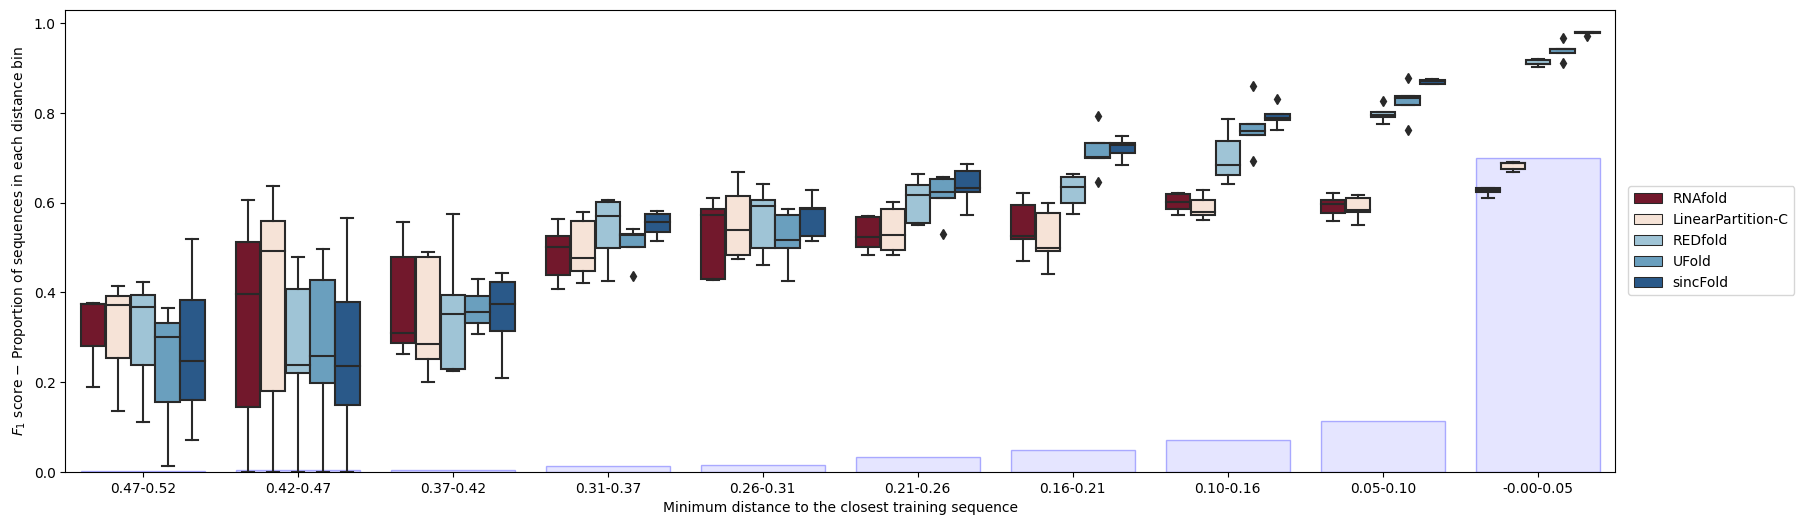

In [8]:
dist = splits[splits.partition=="test"].set_index("id")

summary["min_train_dist"] = dist.loc[summary.index, "min_train_dist"]
summary["dist_bin"] = pd.cut(summary["min_train_dist"], bins=10)
summary['dist_bin'] = summary.dist_bin.apply(lambda x: f'{x.left:.2f}-{x.right:.2f}')

dist_count = summary.groupby("dist_bin").ref.count()
dist_count /= dist_count.sum()
dist_count.sort_values(ascending=True, inplace=True)

# get average per fold per method and dist
summary_avg = summary.groupby(["fold_number", "method", "dist_bin"]).F1.mean().reset_index()


plt.figure(figsize=(20, 6))
bp = sns.barplot(x=dist_count.index.to_numpy(), y=dist_count.values, 
                 facecolor=(0.0,0.0,1.0,0.1), linewidth=1, 
                 edgecolor=(0.0,0.0,1.0,0.3), zorder=-1)
vp = sns.boxplot(data=summary_avg, x="dist_bin", y="F1", hue="method", 
                 zorder=1, hue_order=methods, order=dist_count.index, palette=pal)
vp.set_ylabel("$F_1$ score $-$ Proportion of sequences in each distance bin");
vp.legend(bbox_to_anchor=(1.12,.5), loc='right', ncol=1);
plt.xlabel("Minimum distance to the closest training sequence");


### Performance per length

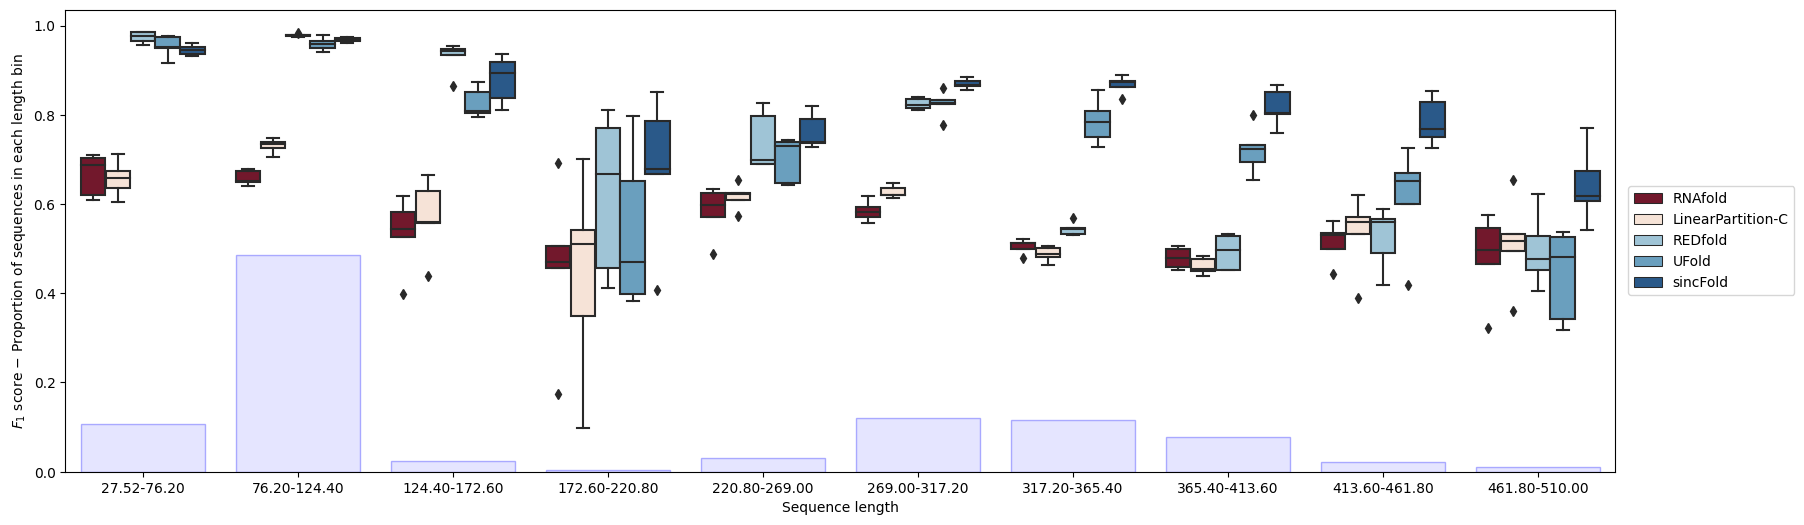

In [9]:
summary["Length"] = dataset.loc[summary.index, "len"]
summary["len_bin"] = pd.cut(summary["Length"], bins=10)
summary['len_bin'] = summary.len_bin.apply(lambda x: f'{x.left:.2f}-{x.right:.2f}')

bin_count = summary.groupby("len_bin").ref.count()
bin_count /= bin_count.sum()
#bin_count.sort_values(ascending=False, inplace=True)

summary_avg = summary.groupby(["fold_number", "method", "len_bin"]).F1.mean().reset_index()

plt.figure(figsize=(20, 6))
bp = sns.barplot(x=bin_count.index, y=bin_count, 
                 facecolor=(0.0,0.0,1.0,0.1), linewidth=1, 
                 edgecolor=(0.0,0.0,1.0,0.3), zorder=-1)
vp = sns.boxplot(data=summary_avg, x="len_bin", y="F1", hue="method", 
                 palette=pal, zorder=1, hue_order=methods, order=bin_count.index)
vp.set_ylabel("$F_1$ score $-$ Proportion of sequences in each length bin");
vp.legend(bbox_to_anchor=(1.12,.5),loc='right', ncol=1);
plt.xlabel("Sequence length");
